In [1]:
import numpy
import matplotlib.pyplot as pyplot
from module.geom2D import Elem, CreateFlashH5

In [2]:
line1 = [numpy.linspace(-0.5,0.5,20),numpy.linspace(-0.25,-0.25,20)]
line2 = [numpy.linspace(0.5,0.5,10)[1:],numpy.linspace(-0.25,0.25,10)[1:]]
line3 = [numpy.linspace(0.5,-0.5,20)[1:],numpy.linspace(0.25,0.25,20)[1:]]
line4 = [numpy.linspace(-0.5,-0.5,10)[1:],numpy.linspace(0.25,-0.25,10)[1:]]

(-0.55, 0.55, -0.275, 0.275)

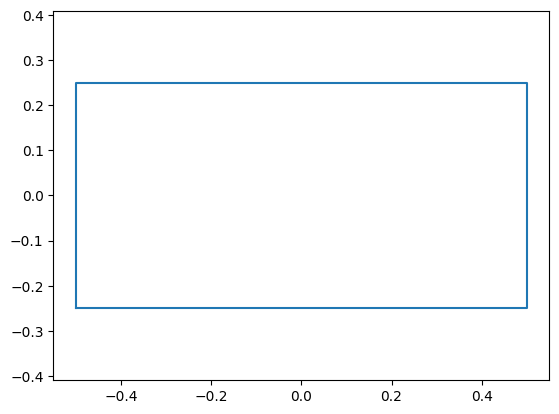

In [3]:
xbody = numpy.concatenate((line1[0],line2[0],line3[0],line4[0]))
ybody = numpy.concatenate((line1[1],line2[1],line3[1],line4[1]))
nbody = len(xbody)

pyplot.figure()
pyplot.plot(xbody,ybody)
pyplot.axis('equal')

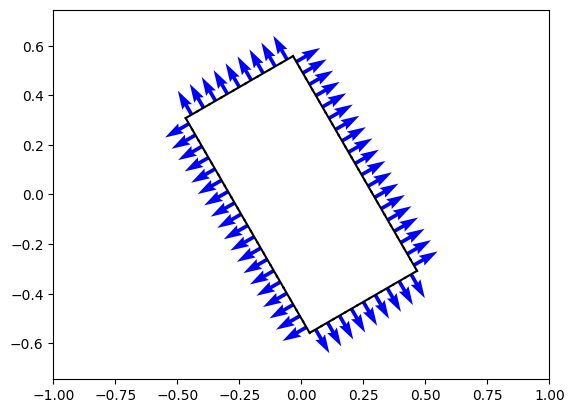

In [4]:
elems = []

for i in range(nbody-1):
    elems.append(Elem([xbody[i+1], ybody[i+1]], 
                      [xbody[i], ybody[i]]))

pyplot.figure()
for elem in elems:
    elem.rotate(120)
    pyplot.plot([elem.pA[0], elem.pB[0]],[elem.pA[1], elem.pB[1]],'k')
    #pyplot.scatter(elem.center[0], elem.center[1], color='k', marker='o', s=100)
    pyplot.quiver(elem.center[0], elem.center[1], elem.normal[0], elem.normal[1], scale=18, color='b')
    #pyplot.quiver(elem.center[0], elem.center[1], elem.tangent[0], elem.tangent[1], scale=18, color='orange')
    pyplot.axis('equal')
    pyplot.xlim([-1, 1])
    pyplot.ylim([-1, 1])

In [5]:
CreateFlashH5("../../simulation/ImBound/Example2D/rectangle_hdf5_ibd_0001", elems)